In [7]:
#import package
from google.colab import drive
#mount my drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import packages required
import pandas as pd
import cv2
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
%matplotlib inline
import os
from google.colab.patches import cv2_imshow
# import package
from PIL import Image
from skimage.feature import hog
from skimage import data, exposure
import joblib

# setup Google Drive path 
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision/CW_Folder/Videos' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['chelsea.avi']


In [9]:
video = 'chelsea.avi'
def EmotionRecognitionVideo(video):
  # set path for videos
  cap = cv2.VideoCapture(os.path.join(GOOGLE_DRIVE_PATH, video))
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  video = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

  # Code to detect faces
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  # loop to extract frame by frame and highlight faces
  fc = 0
  ret = True
  face_crop = []
  while fc < frameCount and ret:
      ret, video[fc] = cap.read()
      video[fc] = cv2.cvtColor(video[fc], cv2.COLOR_BGR2RGB)
      faces = face_cascade.detectMultiScale(video[fc], 1.1, 1)
      for (x,y,w,h) in faces:
          cv2.rectangle(video[fc],(x,y),(x+w,y+h),(0,255,0),2)
          font = cv2.FONT_HERSHEY_DUPLEX
          #cv2.putText(video[fc], 'Person', (x + 6, y - 6), font, 0.5, (0, 255, 0), 1)
          face_crop.append(video[fc][y:y+h, x:x+w])
      fc += 1
  cap.release()

  #print('video shape =', video.shape)

  # Show the 110th frame
  #plt.figure(figsize=(9, 6)) 
  #plt.imshow(video[110, :, :, :])
  #plt.axis('off')
  #plt.show()

  images = []
  # convert images from np to pil and rezise
  for image in face_crop:
      image = Image.fromarray(image)
      image = image.resize((100, 100))
      images.append(image)
  # show image
  #plt.imshow(images[20])


  des_list = []
  y_valid_list = []

  for i in range(len(images)):
      # Extract descriptors with Hog
      HOG_des, HOG_image = hog(images[i], visualize=True, multichannel=True)
      HOG_image_rescaled = exposure.rescale_intensity(HOG_image)

      # Append list of descriptors and label to respective lists
      if HOG_des is not None:
                      des_list.append(HOG_des)
                      #y_valid_list.append(labels[i])

  # Convert to array for easier handling
  des_array = np.vstack(des_list)

  # best model path
  filename = '/content/drive/My Drive/Colab Notebooks/Computer Vision/CW_Folder/Models/MLP.sav'
  # load model
  MLP = joblib.load(filename)
  # predict faces
  predicted = MLP.predict(des_array)
  # shuffle images and predictions
  images, predicted = shuffle(images, predicted)

  # plot 4 random images
  fig, axes = plt.subplots(1, 4, figsize=(14, 7), sharex=True, sharey=True)
  ax = axes.ravel()

  for i in range(4):
      ax[i].imshow(images[i])
      ax[i].set_title(f'Prediction: {predicted[i]}')
      ax[i].set_axis_off()
  fig.tight_layout()
  plt.show()

  return

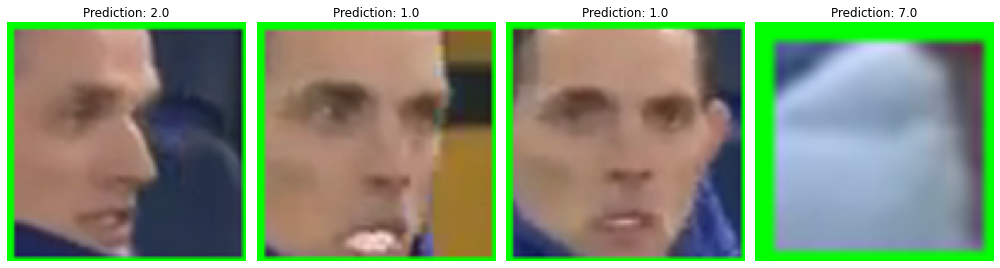

In [12]:
EmotionRecognitionVideo(video)